In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tfmri_classifier.config import CONNECTOMES_DIR, RESOURCES_DIR

In [3]:
def plot_connectome(connectome_path, regions_path=None, title=None, save_path=None):
    conn = np.load(connectome_path)

    region_labels = None
    if regions_path and os.path.exists(regions_path):
        regions = np.load(regions_path).astype(int)
        lut_df = pd.read_csv(os.path.join(RESOURCES_DIR, "FreeSurferColorLUT.csv"))
        lut_dict = dict(zip(lut_df["id"], lut_df["label"]))
        region_labels = [lut_dict.get(r, str(r)) for r in regions]

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        conn,
        cmap='coolwarm',
        center=0,
        square=True,
        cbar_kws={"label": "Pearson r"},
        xticklabels=region_labels,
        yticklabels=region_labels
    )
    plt.title(title or os.path.basename(connectome_path).replace("_", " "))
    plt.xlabel("Region")
    plt.ylabel("Region")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved plot to {save_path}")
    else:
        plt.show()

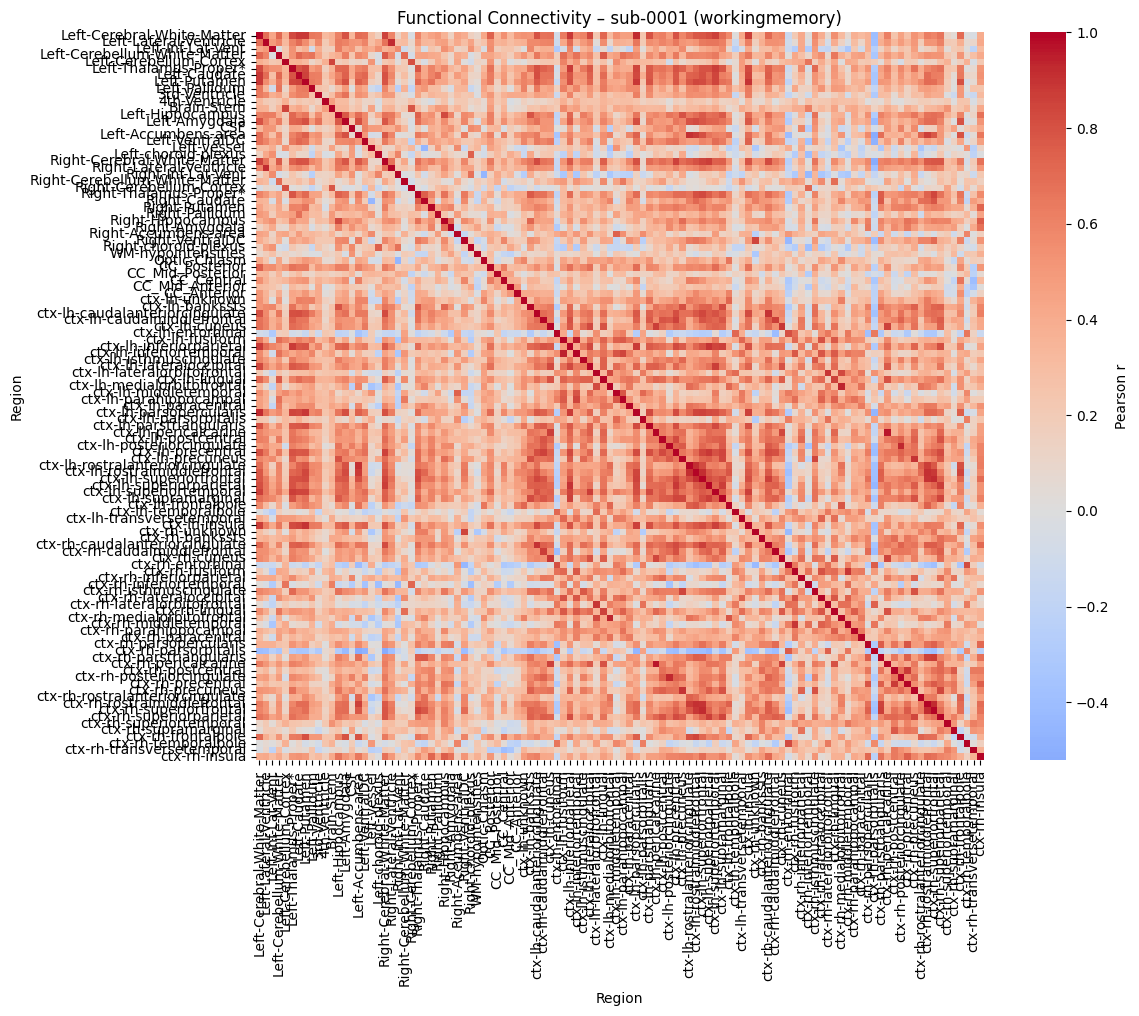

In [4]:
task = "workingmemory"
subject = "sub-0001"
base_path = os.path.join(CONNECTOMES_DIR, task, subject)

conn_path = f"{base_path}_connectome.npy"
regions_path = f"{base_path}_regions.npy"

plot_connectome(
    connectome_path=conn_path,
    regions_path=regions_path,
    title=f"Functional Connectivity – {subject} ({task})"
)
